In [2]:
suppressPackageStartupMessages(source("../tree_helper.R"))
suppressPackageStartupMessages(library(TreeSummarizedExperiment))
suppressPackageStartupMessages(library(phangorn))

saveDir <- "../environment/chimpBrain"

load(file.path(saveDir, "yAll.RData"))
load(file.path(saveDir, "y.RData"))
treeCons <- TreeSummarizedExperiment::rowTree(yAll)

load(file.path(saveDir,  "trenDiDegNodes.RData"))
load(file.path(saveDir,  "detNodes.RData"))

### Plotting the trenDi nodes that map to DEGs but dont contain a single DET
We use plot gardener

In [3]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggtree))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("ggplotify"))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(plyranges))
suppressPackageStartupMessages(library(plotgardener))
library(org.Pt.eg.db)

txdb <- GenomicFeatures::makeTxDbFromGFF("/fs/cbcb-lab/rob/students/noor/Uncertainity/ChimpData/refseq_ind/Pan_troglodytes.Pan_tro_3.0.104.gtf")
txpChimp <- GenomicFeatures::transcripts(txdb)
txpChimp <- txpChimp %>%
  mutate(tx_id = as.character(tx_id))

txpChimp <- txpChimp %>%
  mutate(gene_id = mapIds(
           txdb, keys=tx_id,
           column="GENEID", keytype="TXID")
         ) %>%
  filter(!is.na(gene_id))

txpChimp <- txpChimp %>%
                filter(tx_name %in% intersect(gsub("\\.+\\d+", "", treeCons$tip), mcols(txpChimp)[["tx_name"]]))
colnames(mcols(txpChimp))[3] = "ensID"

genesChimp <- GenomicFeatures::genes(txdb)
colnames(mcols(genesChimp))[1] = "ensID"

assemb <- assembly(Genome = "panTro3",
                   TxDb = txdb, 
                   OrgDb = org.Pt.eg.db,
                  gene.id.column = "ENSEMBL",
                  BSgenome = "BSgenome.Ptroglodytes.UCSC.panTro3")
rownames(y) <- gsub("\\.+\\d+", "", rownames(y))
rownames(yAll) <- gsub("\\.+\\d+", "", rownames(yAll))
treeCons$tip.label <- gsub("\\.+\\d+", "", treeCons$tip.label)
levels(colData(y)[["tissue"]]) <- c("cerbellum", "med.dor.nuc")
levels(colData(yAll)[["tissue"]]) <- c("cerbellum", "med.dor.nuc")
rowTree(yAll) <- treeCons

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:plyranges’:

    select


The following object is masked from ‘package:dplyr’:

    select




Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”
OK

'select()' returned 1:1 mapping between keys and columns



In [64]:
assemb


Please see: help('select') for usage information



$Genome
[1] "panTro3"

$TxDb
TxDb object:
# Db type: TxDb
# Supporting package: GenomicFeatures
# Data source: /fs/cbcb-lab/rob/students/noor/Uncertainity/ChimpData/refseq_ind/Pan_troglodytes.Pan_tro_3.0.104.gtf
# Organism: NA
# Taxonomy ID: NA
# miRBase build ID: NA
# Genome: NA
# Nb of transcripts: 61457
# Db created by: GenomicFeatures package from Bioconductor
# Creation time: 2023-12-27 15:12:12 -0500 (Wed, 27 Dec 2023)
# GenomicFeatures version at creation time: 1.54.1
# RSQLite version at creation time: 2.3.4
# DBSCHEMAVERSION: 1.2

$OrgDb
OrgDb object:
| DBSCHEMAVERSION: 2.1
| Db type: OrgDb
| Supporting package: AnnotationDbi
| DBSCHEMA: CHIMP_DB
| ORGANISM: Pan troglodytes
| SPECIES: Chimp
| EGSOURCEDATE: 2023-Sep11
| EGSOURCENAME: Entrez Gene
| EGSOURCEURL: ftp://ftp.ncbi.nlm.nih.gov/gene/DATA
| CENTRALID: EG
| TAXID: 9598
| GOSOURCENAME: Gene Ontology
| GOSOURCEURL: http://current.geneontology.org/ontology/go-basic.obo
| GOSOURCEDATE: 2023-07-27
| GOEGSOURCEDATE: 2023-Sep11

#### Plots

In [35]:
trenDiNodes <- detNodes[["trenDi"]]

In [66]:
source("../tree_helper.R")

[1] "ENSPTRT00000105901" "ENSPTRT00000097656" "ENSPTRT00000077130"

Phylogenetic tree with 6 tips and 5 internal nodes.

Tip labels:
  ENSPTRT00000105901, ENSPTRT00000097656, ENSPTRT00000077130, ENSPTRT00000082783, ENSPTRT00000086409, ENSPTRT00000100725
Node labels:
  Node70475, Node70476, Node70477, Node70478, Node70479

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000046461"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000086409" "ENSPTRT00000100725" "ENSPTRT00000082783" 
            tx_name4             tx_name5             tx_name6 
"ENSPTRT00000097656" "ENSPTRT00000105901" "ENSPTRT00000077130" 
[1] "ENSPTRT00000105901" "ENSPTRT00000097656" "ENSPTRT00000077130"
[4] "ENSPTRT00000082783" "ENSPTRT00000086409" "ENSPTRT00000100725"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



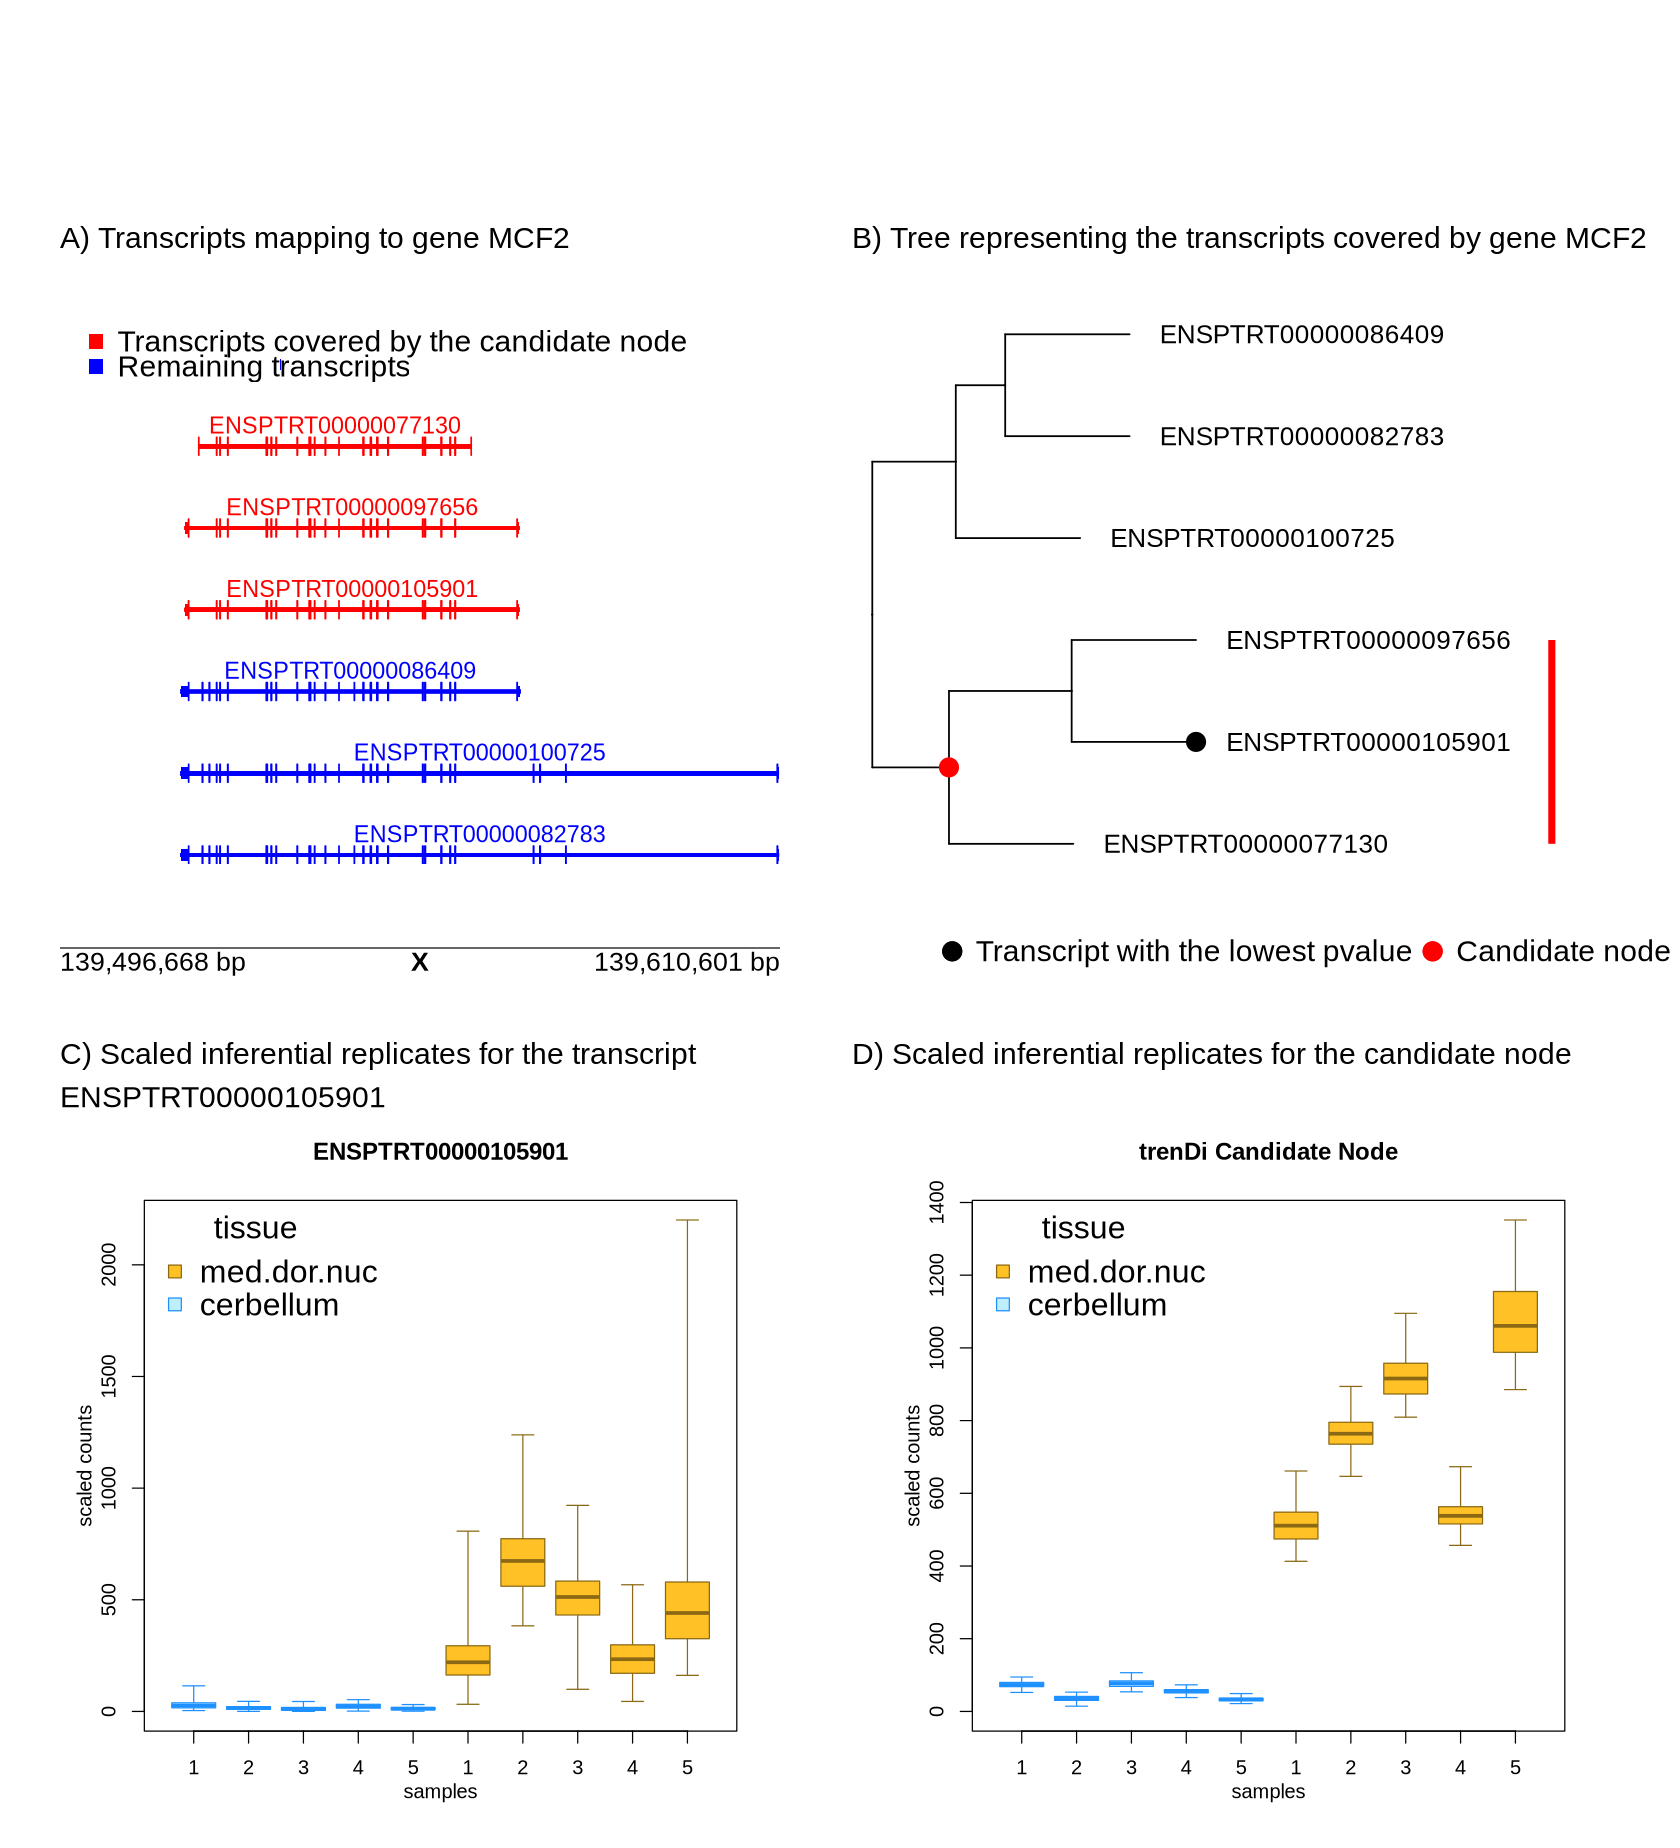

In [67]:
#387,360, 206, 6, 219, 152, 313, 195
i <- 1
j <- 386
tt <- extPreInf(yAll, y, trenDiNodes, trenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 8, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb)

options(repr.plot.width=14, repr.plot.height=15.4)
library(plotgardener)
pageCreate(width = 14, height = 12, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 1, width = 1, height = 0.5,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene MCF2", x = 0.5, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 5.5, width = 5, height = 8.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 6.2, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene MCF2", 
         x = 7.1, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.5, width = 8, height=6
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000105901", 
         x = 0.5, y = 7, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 7.6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 7, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 7.6, width = 6, height=6
)

[1] "ENSPTRT00000100463" "ENSPTRT00000020240"

Phylogenetic tree with 3 tips and 2 internal nodes.

Tip labels:
  ENSPTRT00000100463, ENSPTRT00000020240, ENSPTRT00000098461
Node labels:
  Node66629, Node66630

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000010925"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000100463" "ENSPTRT00000020240" "ENSPTRT00000098461" 
[1] "ENSPTRT00000100463" "ENSPTRT00000020240" "ENSPTRT00000098461"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



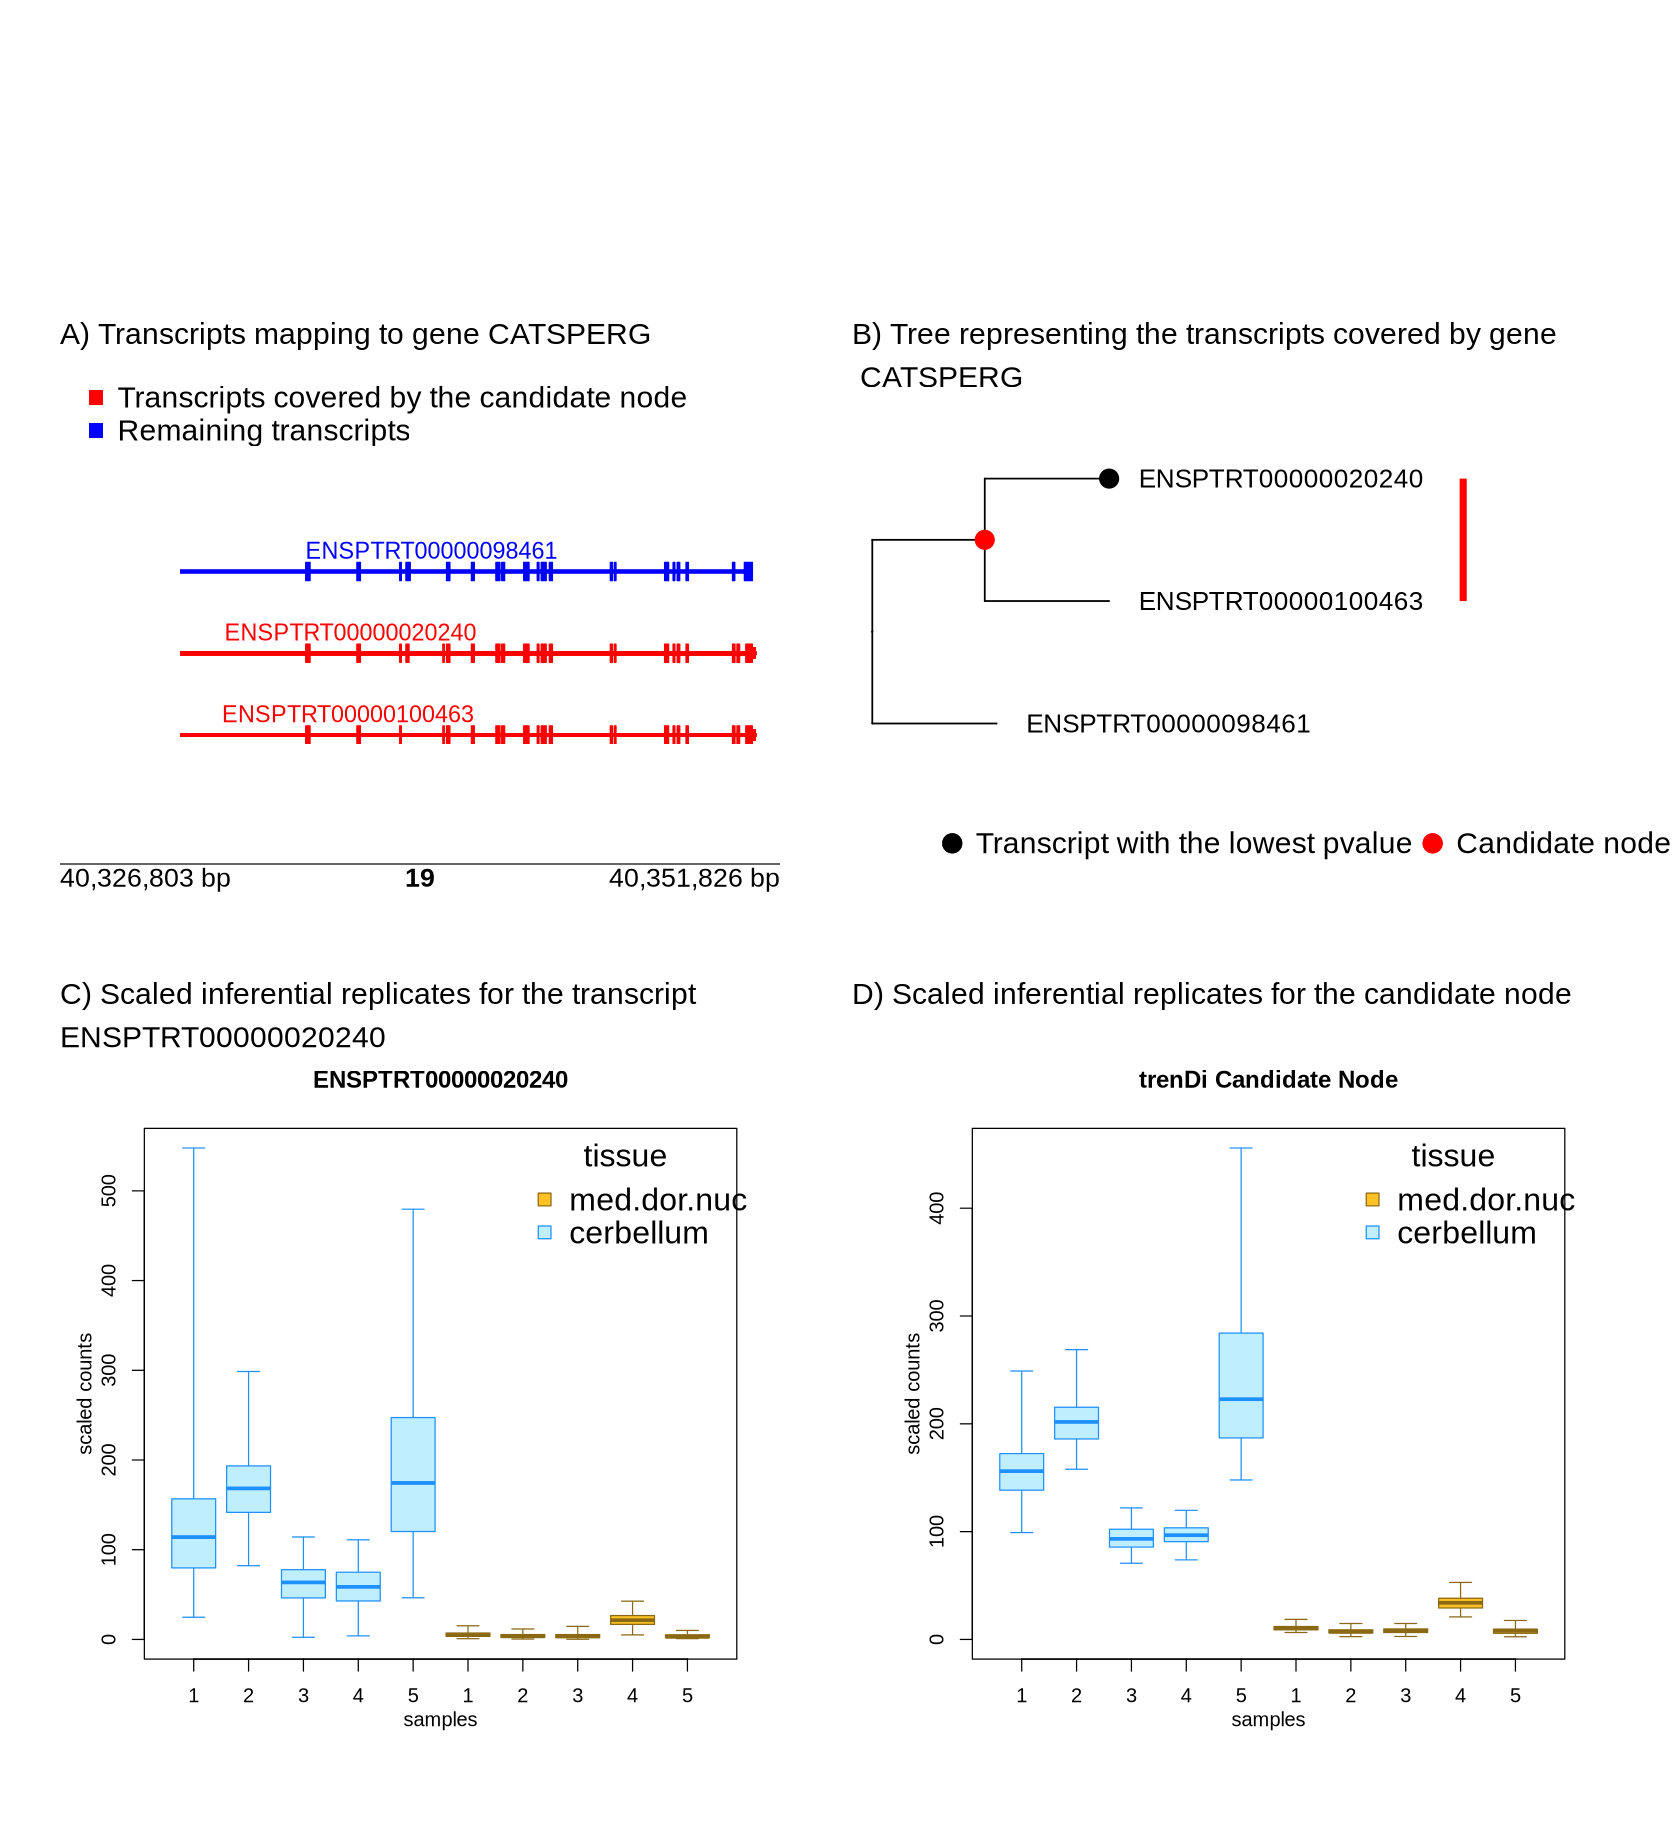

In [69]:
i <- 1
j <- 344
tt <- extPreInf(yAll, y, trenDiNodes, trenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right",x="tissue")
pTree <- plotTree(tt$tSub, 5, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 1000)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene CATSPERG", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 3.5, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.5, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene \n CATSPERG", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000020240", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)

[1] "ENSPTRT00000107110" "ENSPTRT00000013074"

Phylogenetic tree with 3 tips and 2 internal nodes.

Tip labels:
  ENSPTRT00000107110, ENSPTRT00000013074, ENSPTRT00000096752
Node labels:
  Node69317, Node69318

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000007085"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000013074" "ENSPTRT00000107110" "ENSPTRT00000096752" 
[1] "ENSPTRT00000107110" "ENSPTRT00000013074" "ENSPTRT00000096752"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



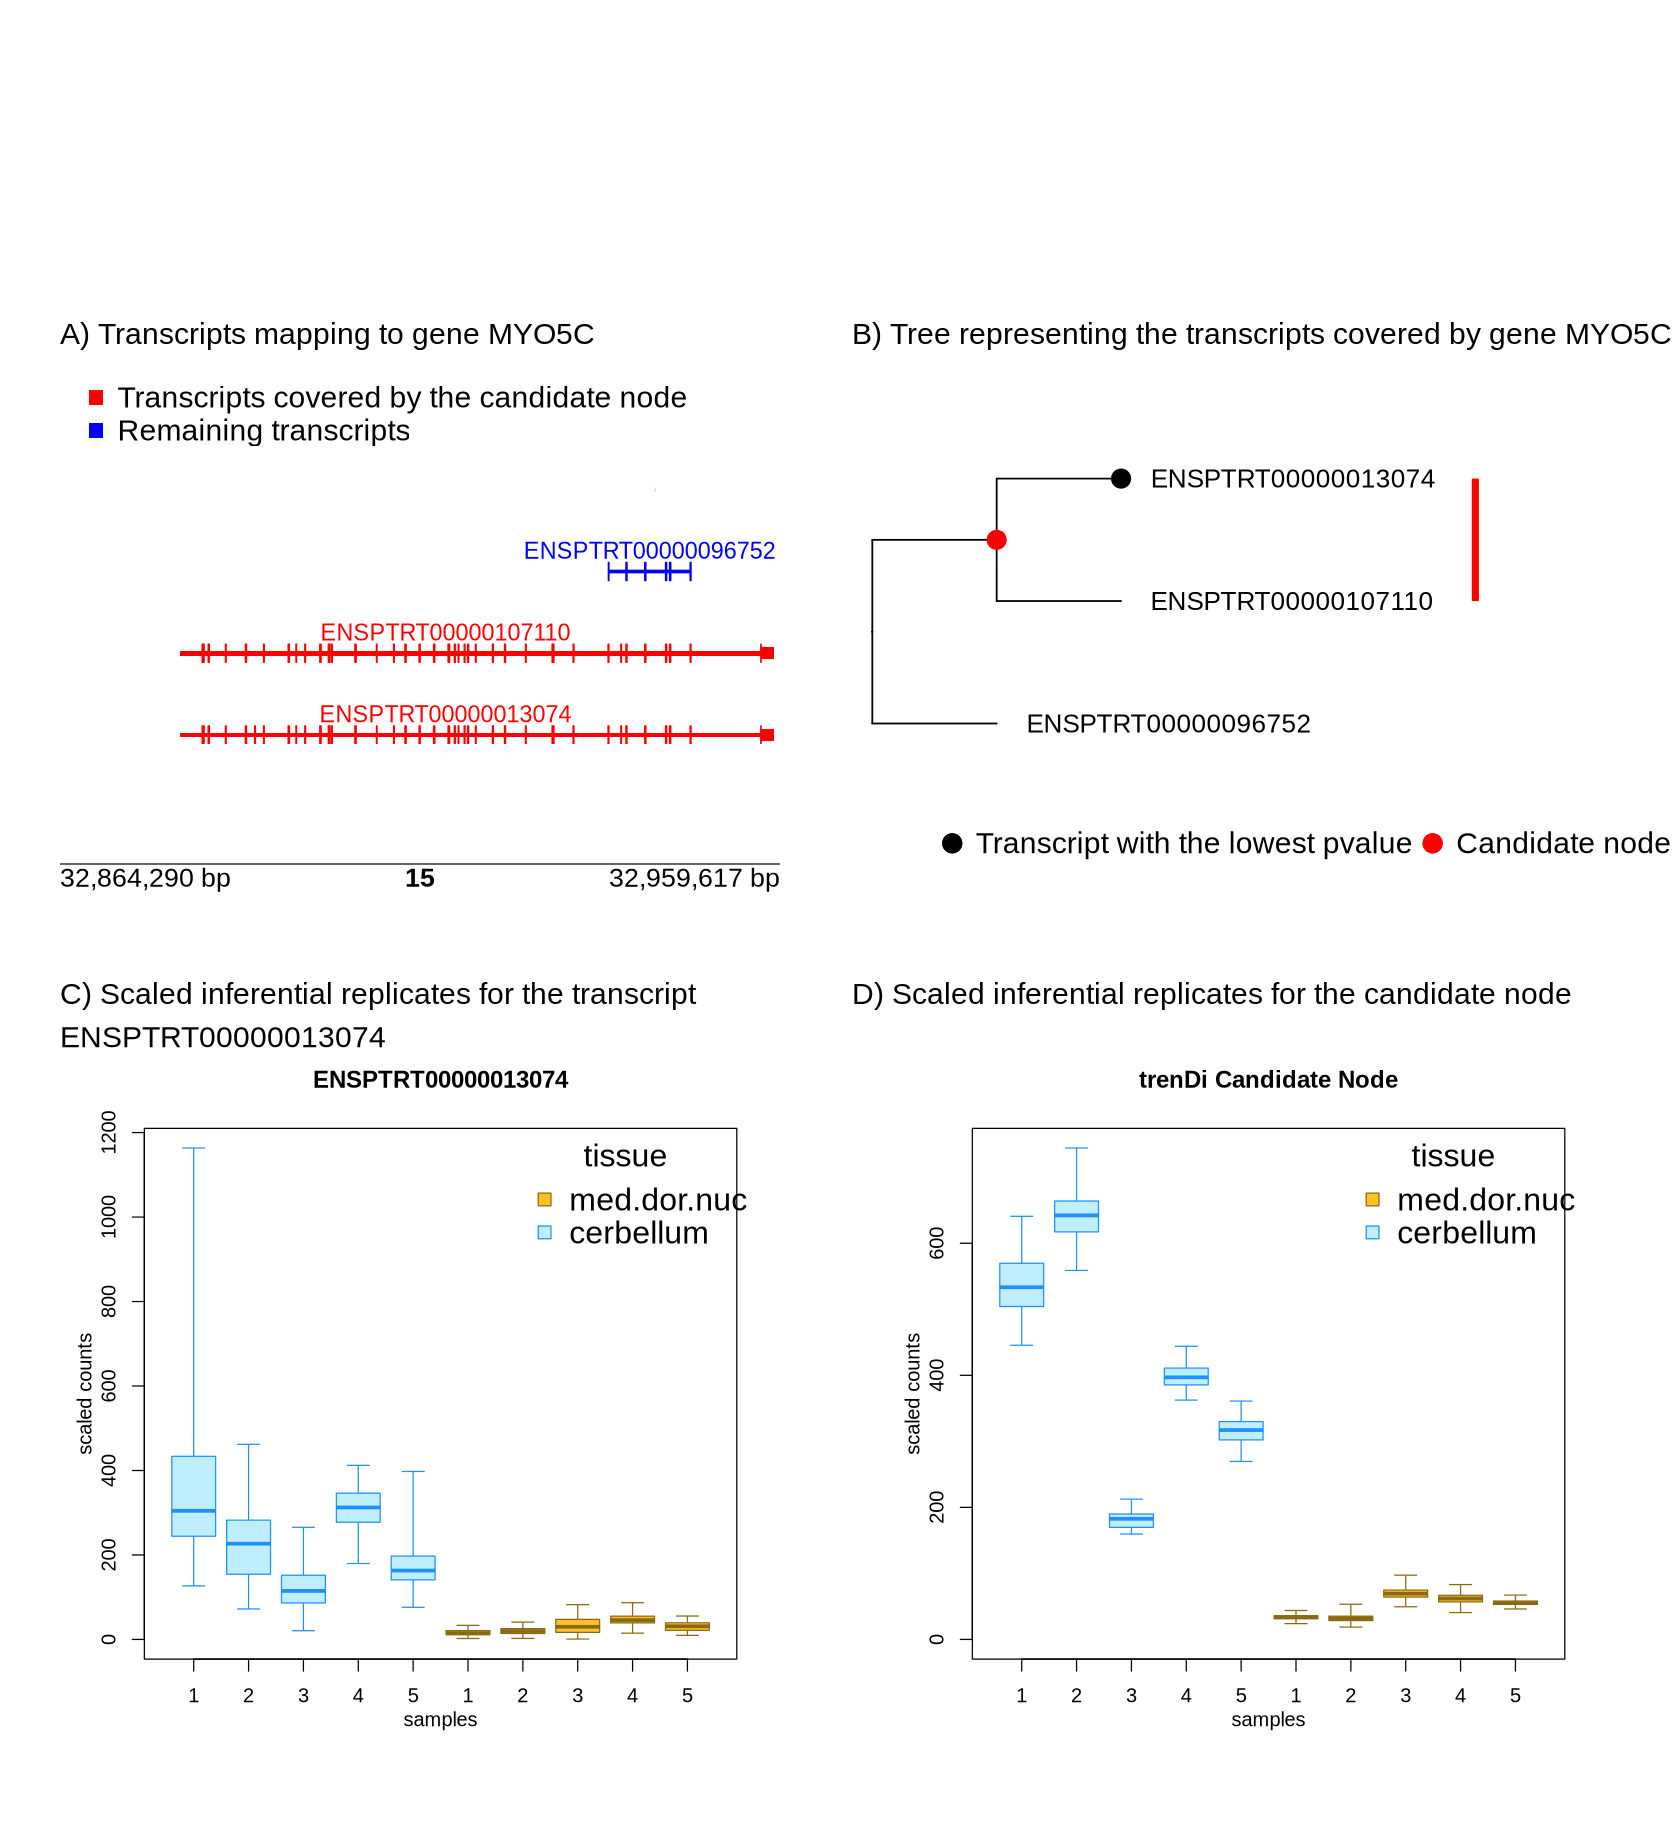

In [70]:
i <- 1
j <- 367
tt <- extPreInf(yAll, y, trenDiNodes, trenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right",x="tissue")
pTree <- plotTree(tt$tSub, 5, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 1000)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene MYO5C", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 3.5, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.5, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene MYO5C", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000013074", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)

[1] "ENSPTRT00000104666" "ENSPTRT00000034383"

Phylogenetic tree with 5 tips and 4 internal nodes.

Tip labels:
  ENSPTRT00000104666, ENSPTRT00000034383, ENSPTRT00000101457, ENSPTRT00000082797, ENSPTRT00000079092
Node labels:
  Node62554, Node62555, Node62556, Node62557

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000018619"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000101457" "ENSPTRT00000079092" "ENSPTRT00000082797" 
            tx_name4             tx_name5 
"ENSPTRT00000034383" "ENSPTRT00000104666" 
[1] "ENSPTRT00000104666" "ENSPTRT00000034383" "ENSPTRT00000101457"
[4] "ENSPTRT00000082797" "ENSPTRT00000079092"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



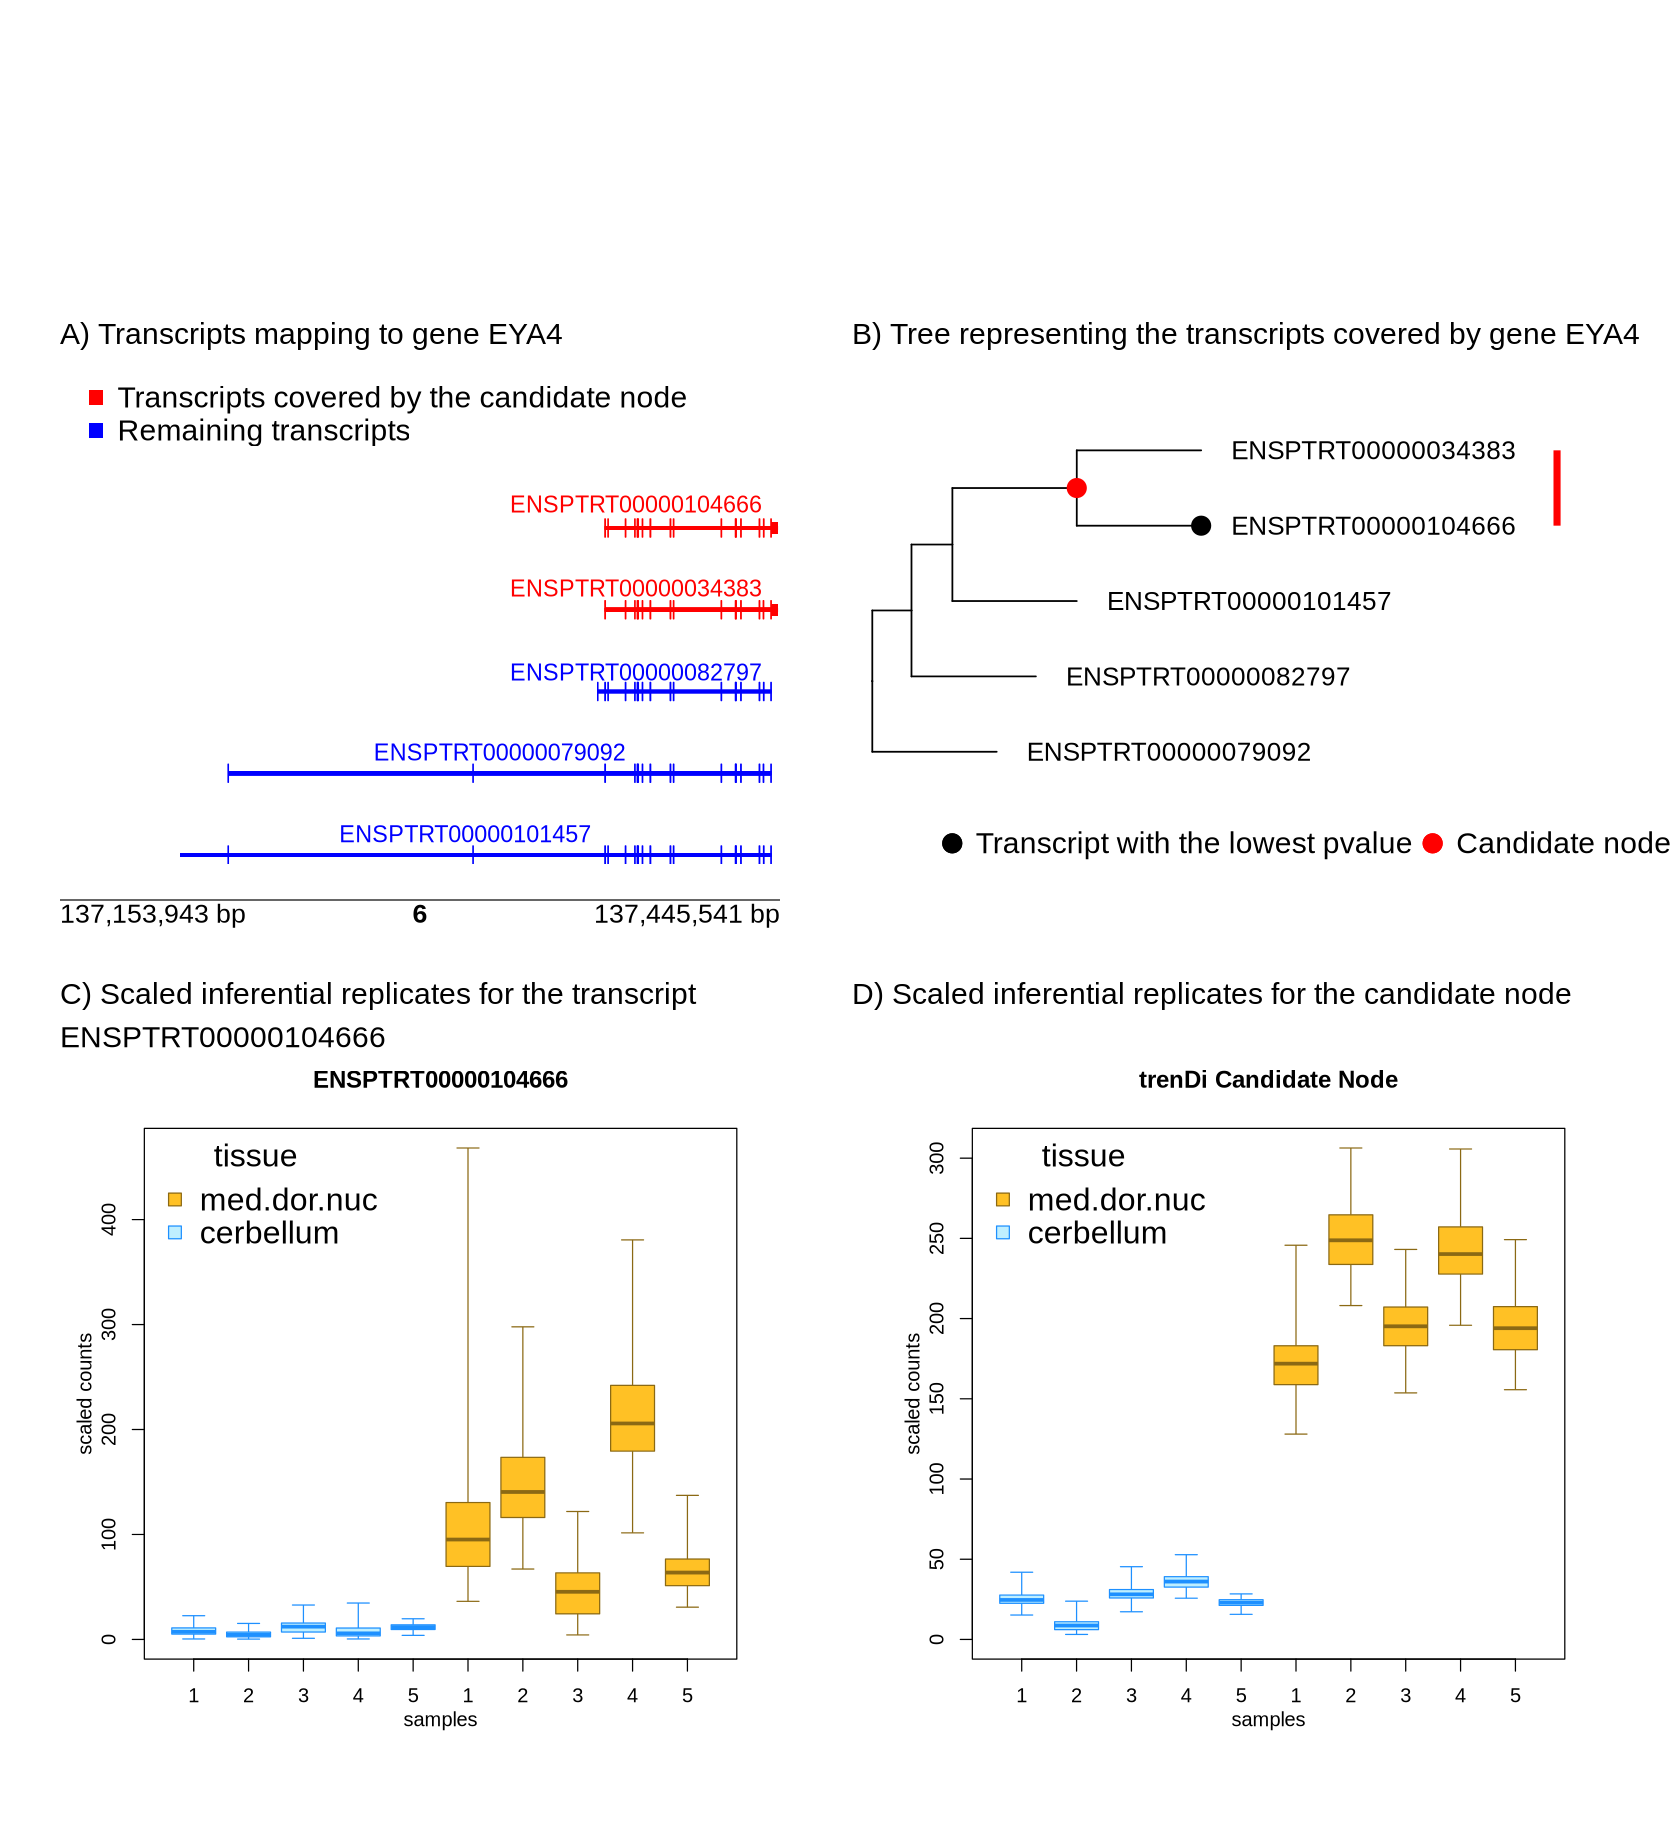

In [71]:
i <- 1
j <- 269
tt <- extPreInf(yAll, y, trenDiNodes, trenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 1000)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

parTxpR  <- pgParams(
    fontsize = 14,
    fontcolor="red"
)
parTxpB  <- pgParams(
    fontsize = 14,
    fontcolor="blue"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene EYA4", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 4.5, width = 5, height = 8, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)
plotText(label="ENSPTRT00000104666", x = 5.3, y = 1.5,
        params = parTxpR)
plotText(label="ENSPTRT00000034383", x = 5.3, y = 2.2,
        params = parTxpR)
plotText(label="ENSPTRT00000082797", x = 5.3, y = 2.9,
        params = parTxpB)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.8, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene EYA4", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000104666", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)

[1] "ENSPTRT00000110284" "ENSPTRT00000043834" "ENSPTRT00000100696"

Phylogenetic tree with 4 tips and 3 internal nodes.

Tip labels:
  ENSPTRT00000110284, ENSPTRT00000043834, ENSPTRT00000100696, ENSPTRT00000106916
Node labels:
  Node61676, Node61677, Node61678

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000008779"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000106916" "ENSPTRT00000110284" "ENSPTRT00000043834" 
            tx_name4 
"ENSPTRT00000100696" 
[1] "ENSPTRT00000110284" "ENSPTRT00000043834" "ENSPTRT00000100696"
[4] "ENSPTRT00000106916"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

text[text2]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



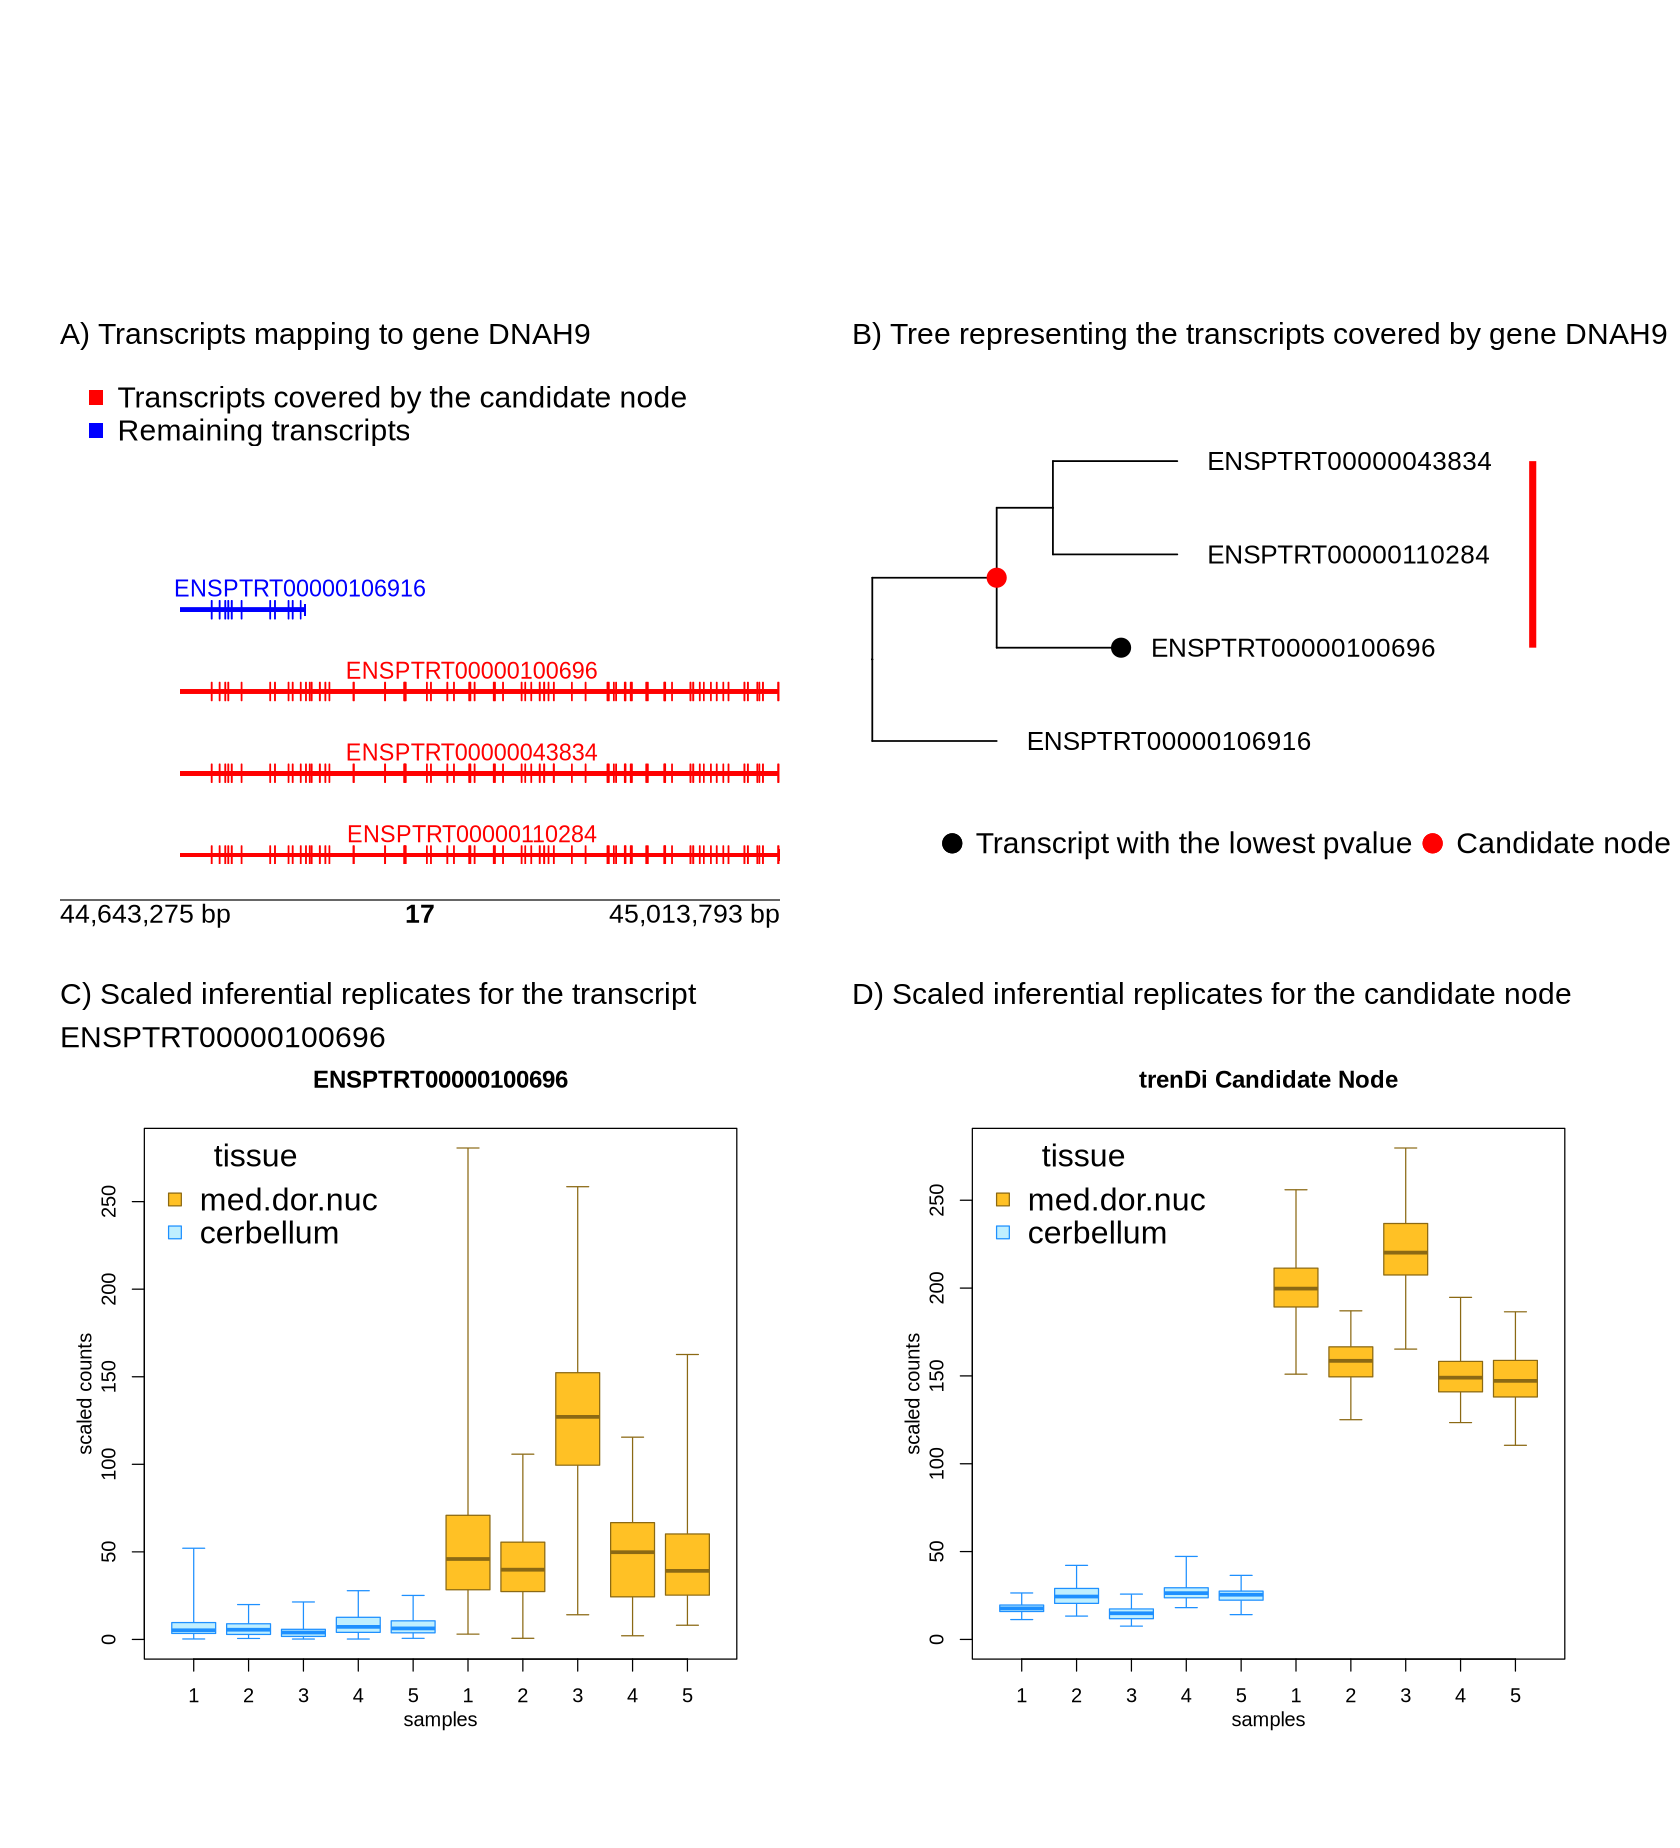

In [72]:
i <- 1
j <- 252
tt <- extPreInf(yAll, y, trenDiNodes, trenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 6, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parTxpB  <- pgParams(
    fontsize = 14,
    fontcolor="blue"
)
parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene DNAH9", x = 0.5, y = 0,
        params = parText)
plotText(label="ENSPTRT00000106916", x = 2.5, y = 2.2,
        params = parTxpB)


plotTranscripts(
    params = par, x = 1.5, y = 4.5, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.8, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene DNAH9", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000100696", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)

[1] "ENSPTRT00000097751" "ENSPTRT00000037658"

Phylogenetic tree with 3 tips and 2 internal nodes.

Tip labels:
  ENSPTRT00000097751, ENSPTRT00000037658, ENSPTRT00000083071
Node labels:
  Node49768, Node49769

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000020337"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000097751" "ENSPTRT00000083071" "ENSPTRT00000037658" 
[1] "ENSPTRT00000097751" "ENSPTRT00000037658" "ENSPTRT00000083071"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



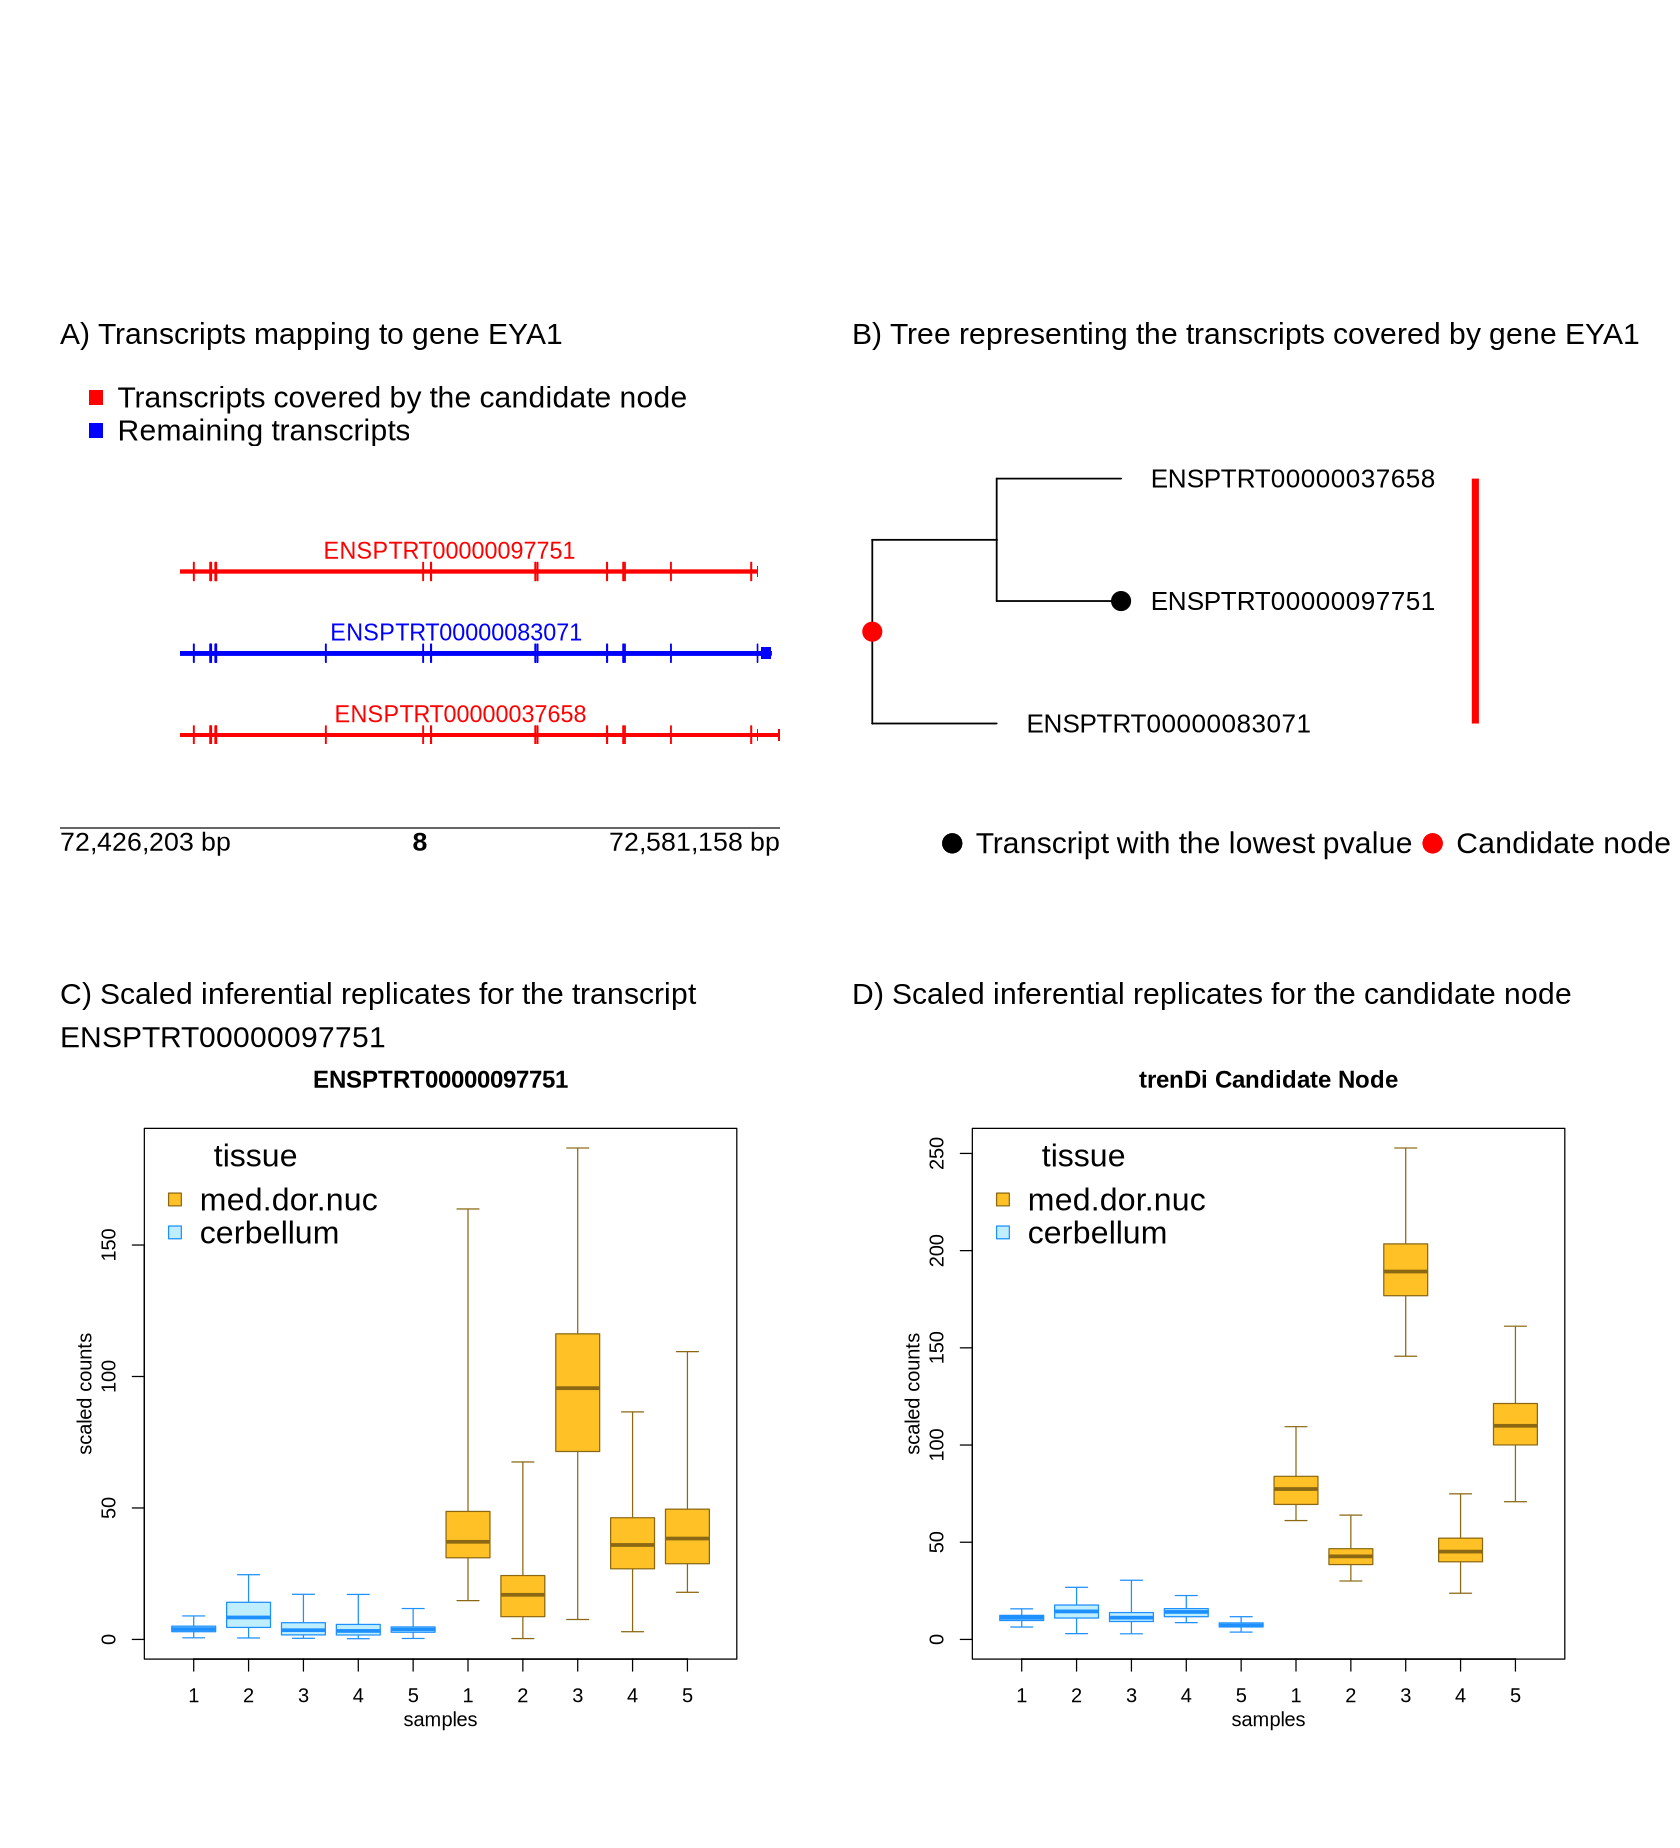

In [73]:
i <- 1
j <- 70

tt <- extPreInf(yAll, y, trenDiNodes, trenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 4, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")



hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene EYA1", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 3.5, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.2, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene EYA1", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000097751", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)

[1] "ENSPTRT00000094046" "ENSPTRT00000076996" "ENSPTRT00000018121"
[4] "ENSPTRT00000100719"

Phylogenetic tree with 6 tips and 5 internal nodes.

Tip labels:
  ENSPTRT00000094046, ENSPTRT00000076996, ENSPTRT00000018121, ENSPTRT00000100719, ENSPTRT00000076649, ENSPTRT00000111345
Node labels:
  Node49233, Node49234, Node49235, Node49236, Node49237

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000009868"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000094046" "ENSPTRT00000076996" "ENSPTRT00000076649" 
            tx_name4             tx_name5             tx_name6 
"ENSPTRT00000018121" "ENSPTRT00000111345" "ENSPTRT00000100719" 
[1] "ENSPTRT00000094046" "ENSPTRT00000076996" "ENSPTRT00000018121"
[4] "ENSPTRT00000100719" "ENSPTRT00000076649" "ENSPTRT00000111345"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



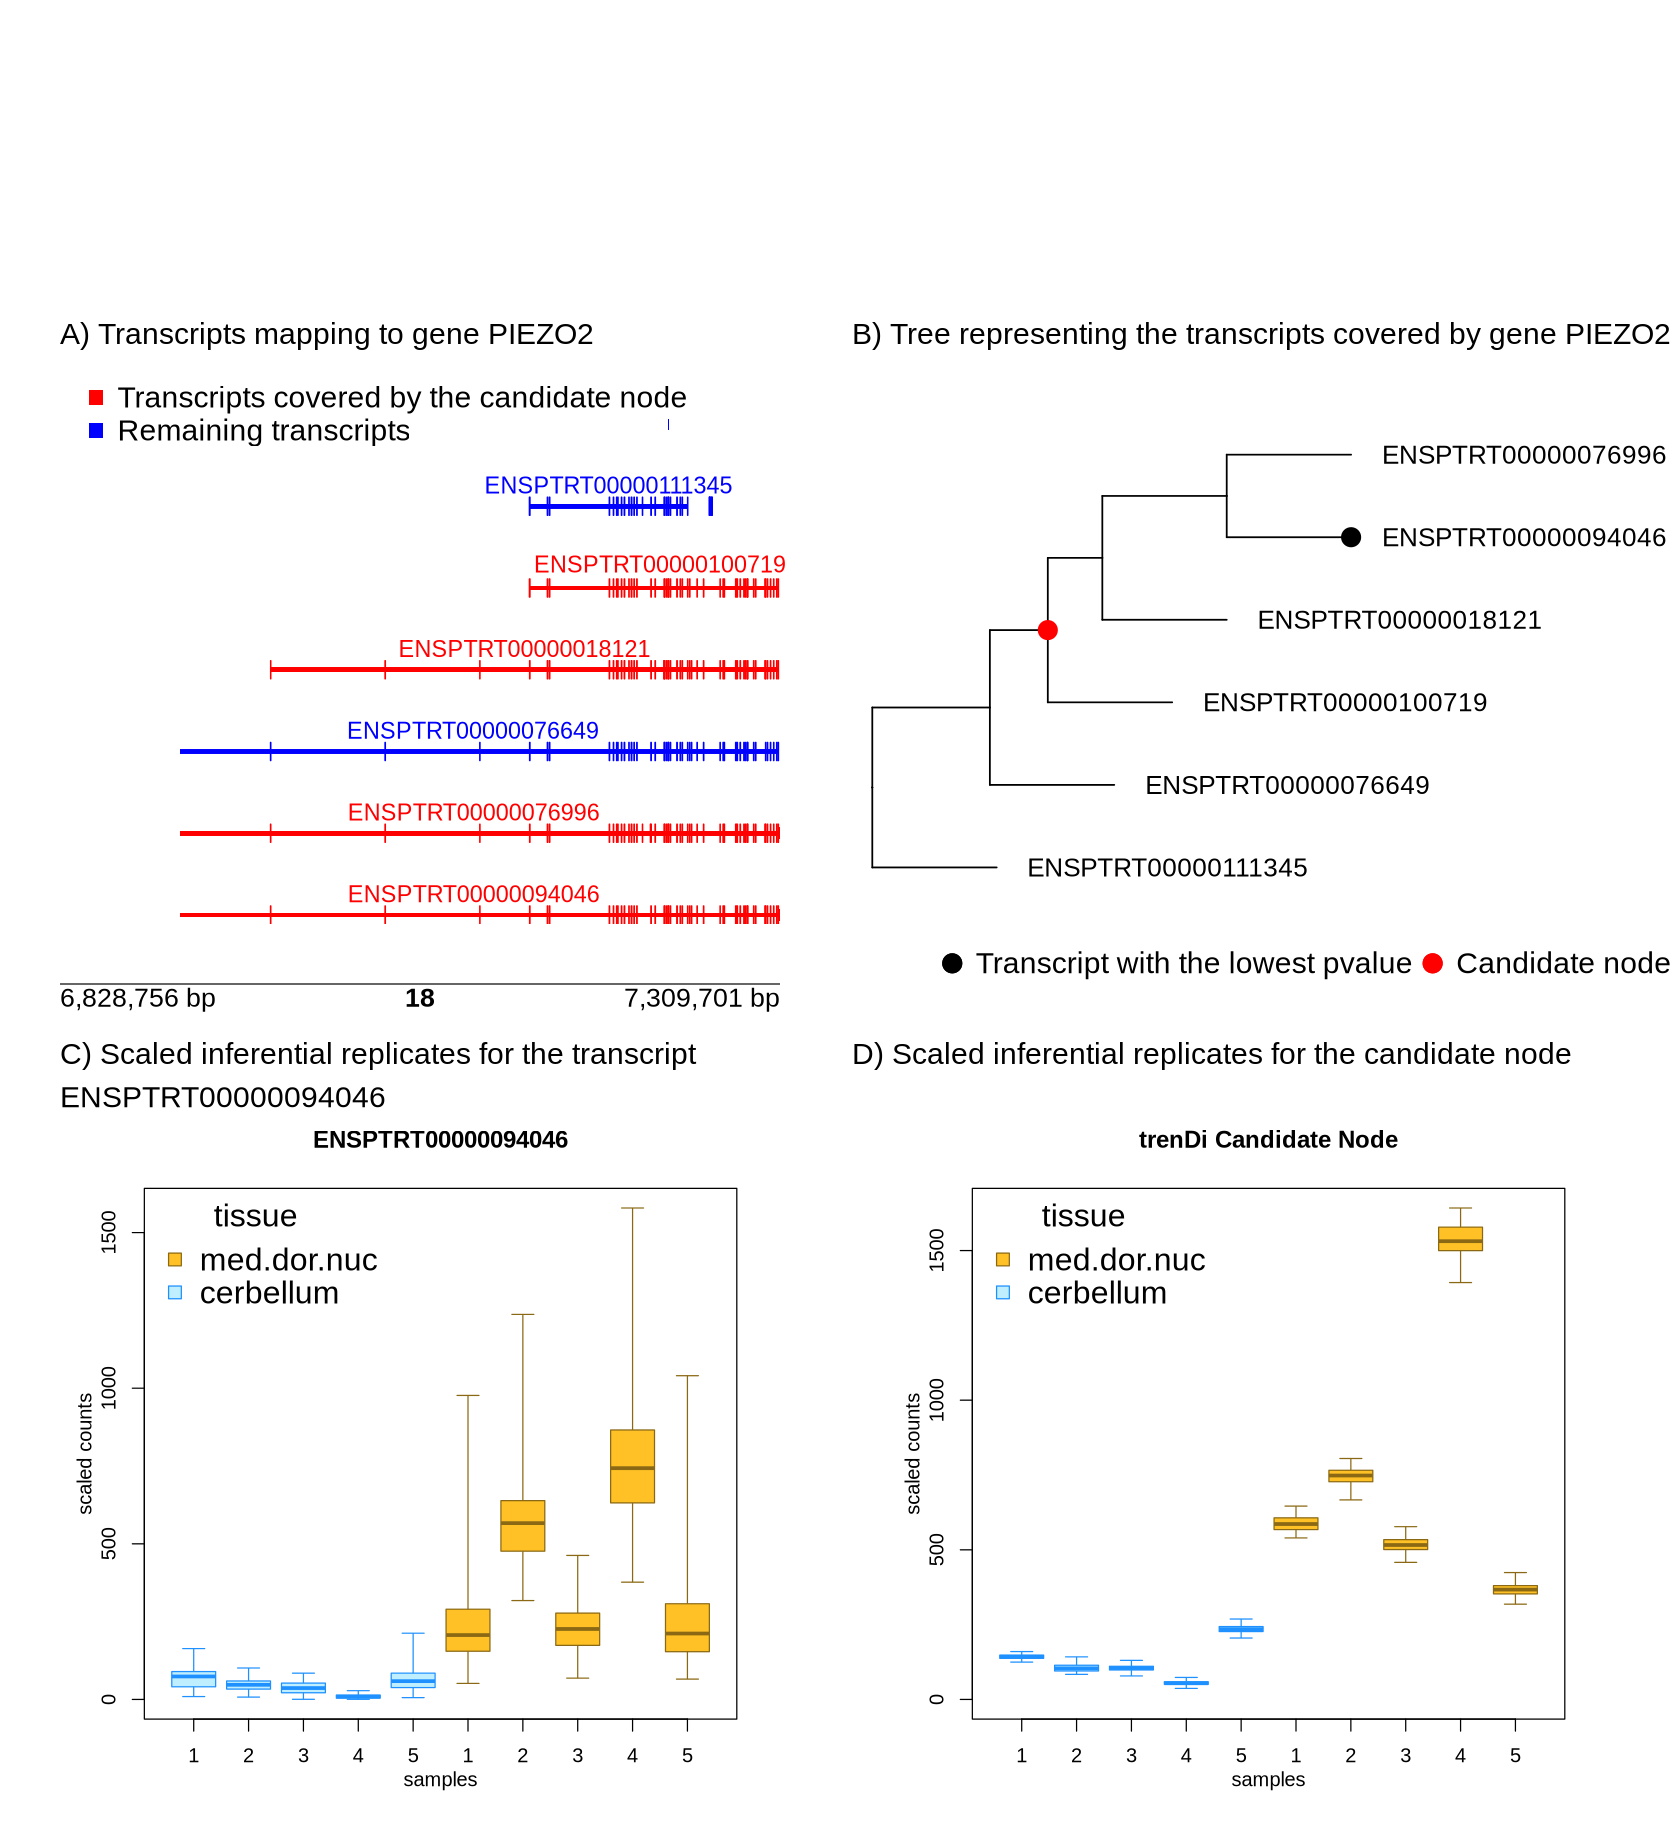

In [74]:
i <- 1
j <- 62

tt <- extPreInf(yAll, y, trenDiNodes, trenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")
parTextB <- pgParams(
    fontcolor="red", fontsize = 14
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene PIEZO2", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 5, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotText(label="ENSPTRT00000100719", x = 5.5, y = 2,
        params = parTxpR)

plotGenomeLabel(
  params = par, x = 0.5, y = 5.5, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene PIEZO2", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=5
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000094046", 
         x = 0.5, y = 6, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6.5, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 6, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6.5, width = 6, height=6
)

[1] "ENSPTRT00000103768" "ENSPTRT00000106540"

Phylogenetic tree with 5 tips and 4 internal nodes.

Tip labels:
  ENSPTRT00000077349, ENSPTRT00000026466, ENSPTRT00000078307, ENSPTRT00000103768, ENSPTRT00000106540
Node labels:
  Node60564, Node60565, Node60566, Node60567

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000014167"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000026466" "ENSPTRT00000078307" "ENSPTRT00000077349" 
            tx_name4             tx_name5 
"ENSPTRT00000103768" "ENSPTRT00000106540" 
[1] "ENSPTRT00000077349" "ENSPTRT00000026466" "ENSPTRT00000078307"
[4] "ENSPTRT00000103768" "ENSPTRT00000106540"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



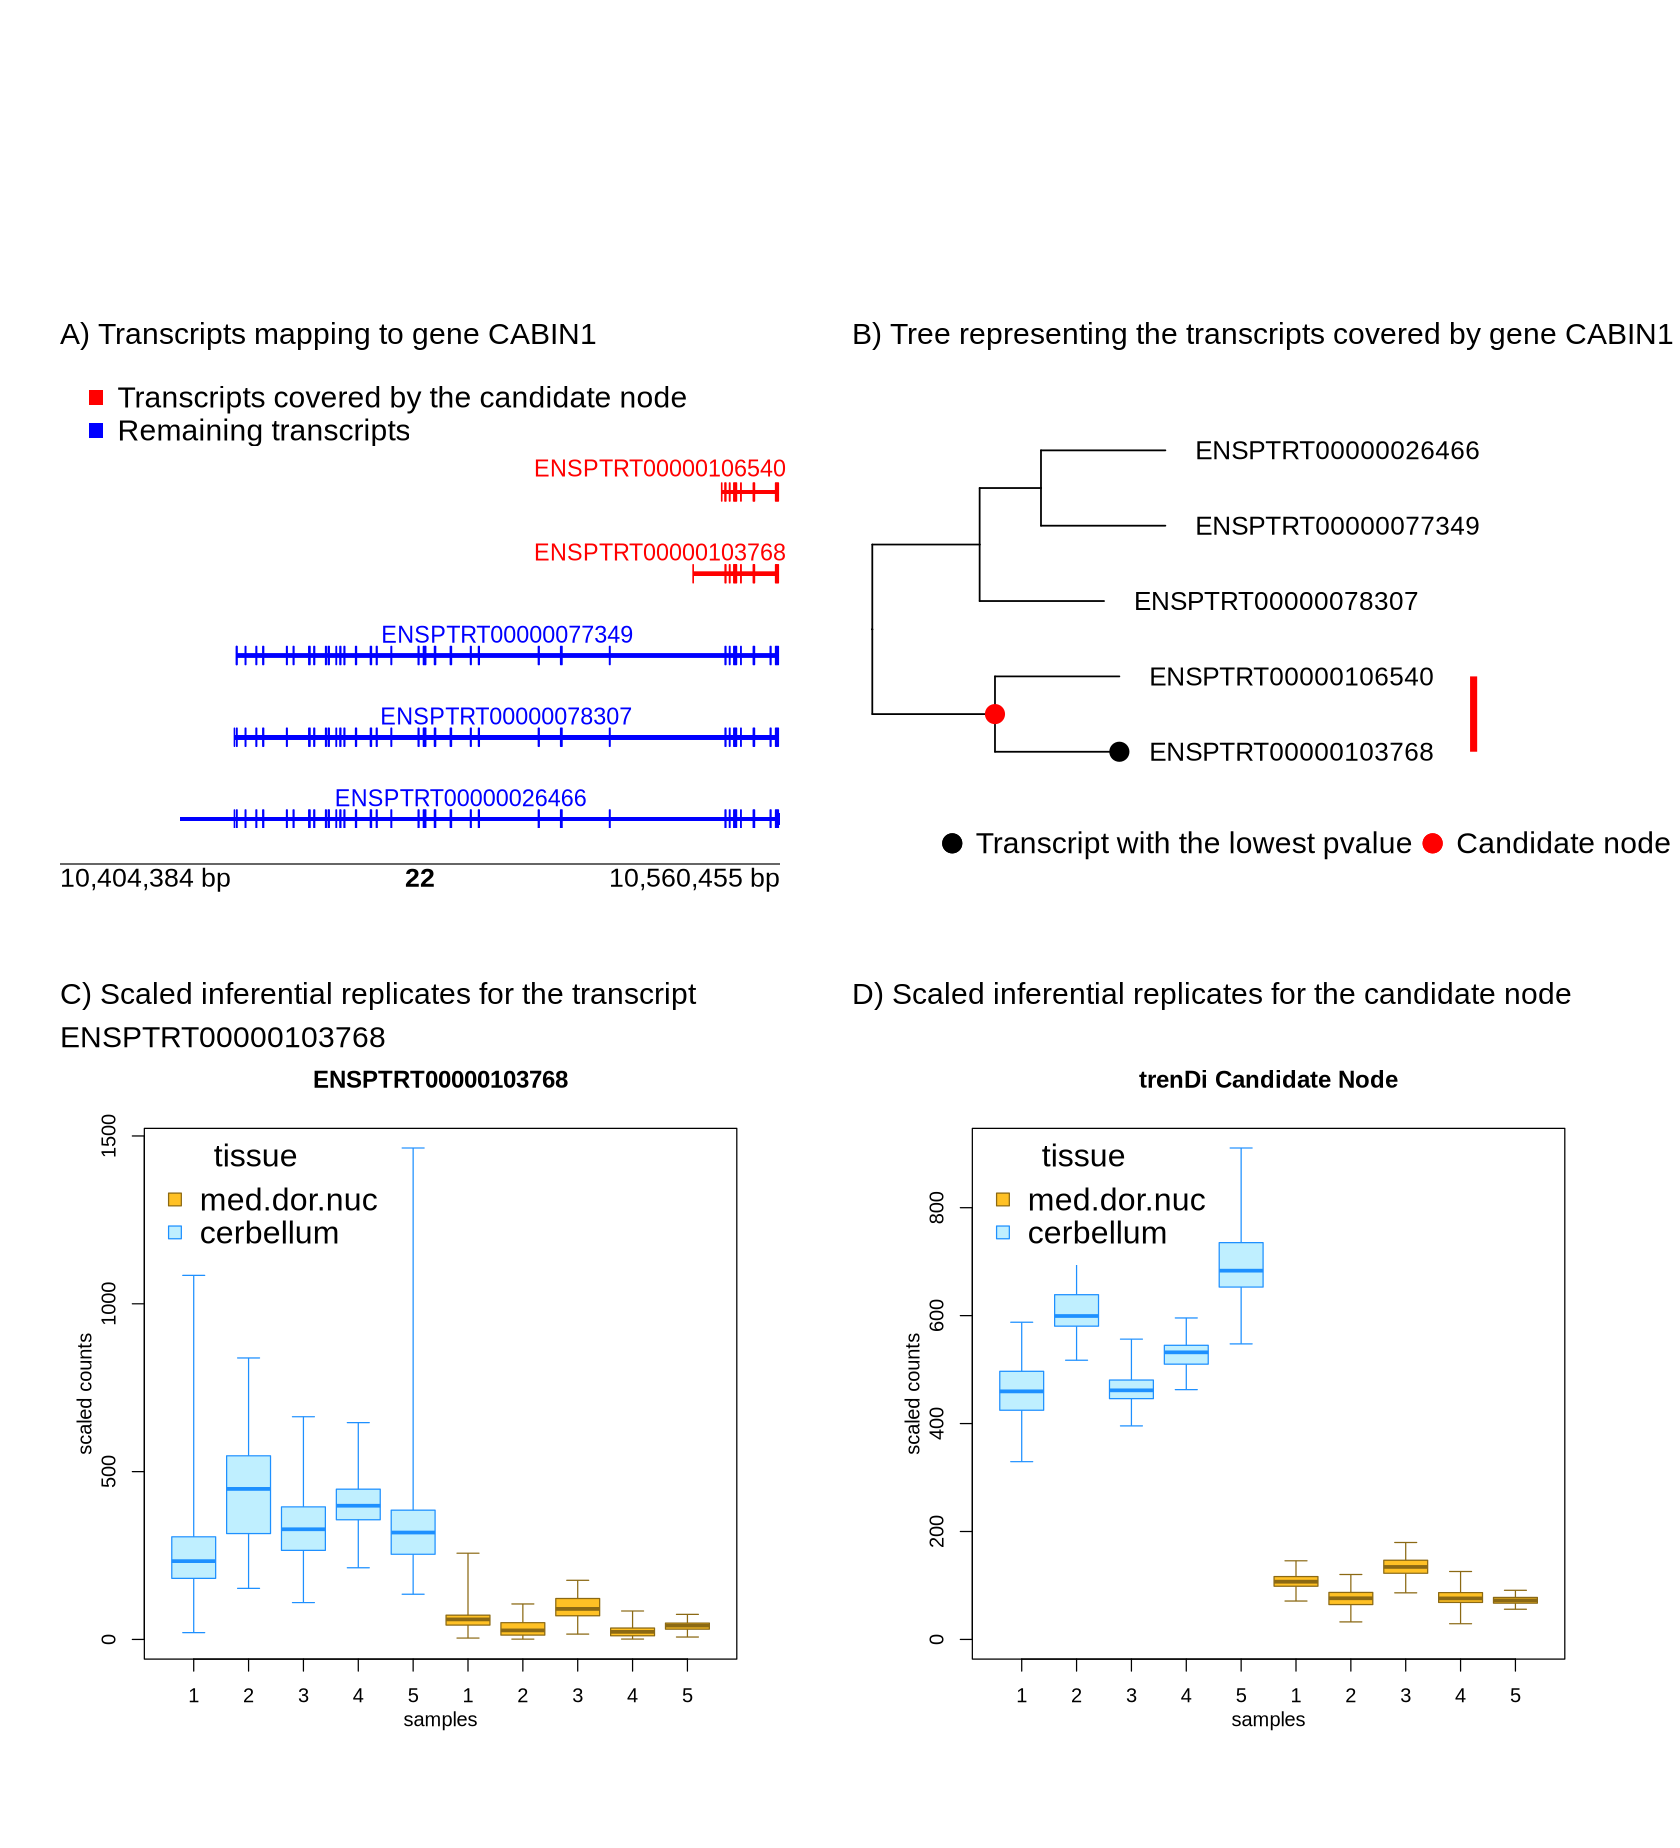

In [75]:
i <- 1
j <- 230

tt <- extPreInf(yAll, y, trenDiNodes, trenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

parTxp  <- pgParams(
    fontsize = 14,
    fontcolor="red"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene CABIN1", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 4.2, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)
plotText(label="ENSPTRT00000106540", x = 5.5, y = 1.2,
        params = parTxp)
plotText(label="ENSPTRT00000103768", x = 5.5, y = 1.9,
        params = parTxp)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.5, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene CABIN1", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000103768", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)